In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\placement.csv")
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


<Axes: xlabel='placed', ylabel='Density'>

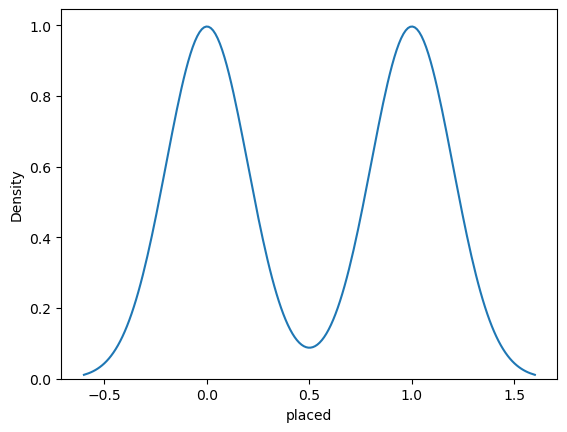

In [9]:
 sns.kdeplot(df['placed'])

<Axes: xlabel='cgpa', ylabel='Density'>

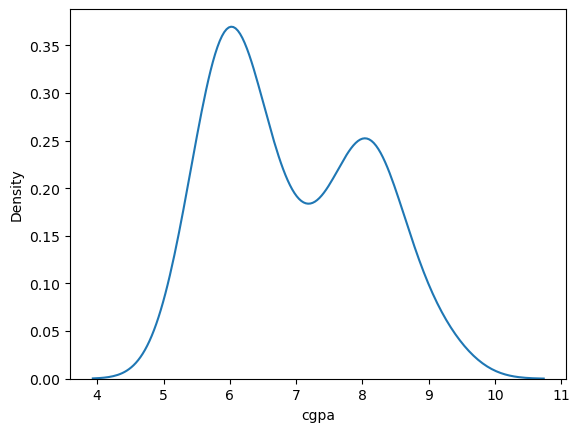

In [11]:
 sns.kdeplot(df['cgpa'])

<Axes: xlabel='resume_score', ylabel='Density'>

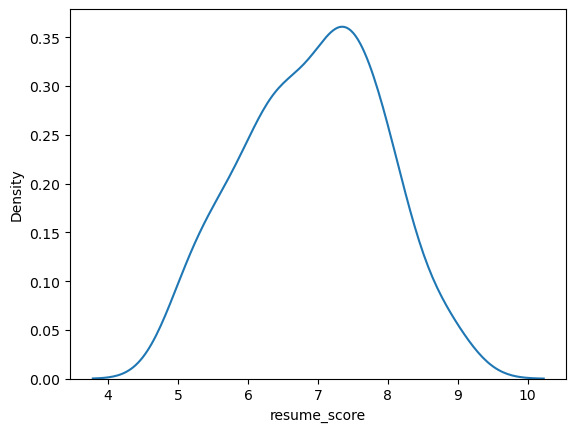

In [15]:
sns.kdeplot(df['resume_score'])

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('cgpa',axis=1),
                                                       df['cgpa'],
                                                       test_size=0.3,
                                                       random_state=0)
x_train.shape,x_test.shape

((70, 2), (30, 2))

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

# fit the scaler to the train set , it will learn the parametrs
scaler.fit(x_train)
# transform train and test sets

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
  

In [87]:
x_train_scaled=pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [89]:
np.round(x_train.describe() , 1)

,resume_score,placed
count,70.0,70.0
mean,7.0,0.5
std,1.0,0.5
min,5.0,0.0
25%,6.3,0.0
50%,7.2,0.5
75%,7.7,1.0
max,9.1,1.0


In [91]:
np.round(x_train_scaled.describe() , 1)

,resume_score,placed
count,70.0,70.0
mean,0.5,0.5
std,0.2,0.5
min,0.0,0.0
25%,0.3,0.0
50%,0.5,0.5
75%,0.7,1.0
max,1.0,1.0


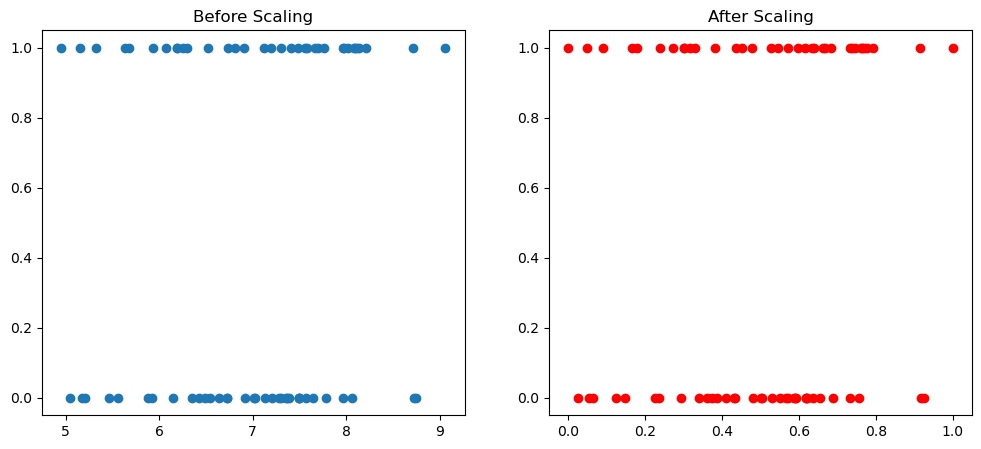

In [101]:
fig,(ax1 ,ax2)=plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train["resume_score"],x_train['placed'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled["resume_score"],x_train_scaled['placed'],color='red')
ax2.set_title("After Scaling")
plt.show()